In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

print(tf.__version__)

/Users/spencerdixon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.9.0


In [28]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalise values, notice how we reshape the images to include the colour dimension?

x_train = x_train.reshape(60000, 28, 28, 1) / 255.
x_test  = x_test.reshape(10000, 28, 28, 1) / 255.

In [29]:
classification_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

AxesImage(54,36;334.8x217.44)
Classification: Ankle boot (9))


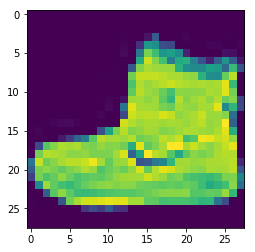

In [30]:
print(plt.imshow(x_train[0].reshape(28, 28))) # Reshape back to normal to display

label = y_train[0]

print("Classification: {} ({}))".format(classification_dict[label], label))

In [31]:
input_shape = (28, 28, 1) # Image shape # w / h / rbg (one because greyscale)
outputs     = 10       # Number of classes

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(outputs, activation=tf.nn.softmax)
])

In [32]:
model.summary()

# Notice how the output shape of the first layer drops down by 2px on each side
# We're not padding our image so we lose a layer, as the first row our filter can fit on is the second row

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total para

In [33]:
model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss='sparse_categorical_crossentropy'
)

In [34]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 46s 767us/step - loss: 0.4425
Epoch 2/10
60000/60000 [==============================] - 49s 816us/step - loss: 0.2943
Epoch 3/10
60000/60000 [==============================] - 50s 831us/step - loss: 0.2507
Epoch 4/10
60000/60000 [==============================] - 45s 744us/step - loss: 0.2192
Epoch 5/10
60000/60000 [==============================] - 46s 774us/step - loss: 0.1918
Epoch 6/10
60000/60000 [==============================] - 46s 766us/step - loss: 0.1686
Epoch 7/10
60000/60000 [==============================] - 49s 821us/step - loss: 0.1492
Epoch 8/10
60000/60000 [==============================] - 45s 750us/step - loss: 0.1316
Epoch 9/10
60000/60000 [==============================] - 48s 793us/step - loss: 0.1173
Epoch 10/10
60000/60000 [==============================] - 48s 805us/step - loss: 0.1008


In [36]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 241us/step


0.30928102153837683

# Visualising our Conv net

In [52]:
model.layers

In [53]:
layer_outputs = [layer.output for layer in model.layers]

layer_outputs

[<tf.Tensor 'conv2d_8/Relu:0' shape=(?, 26, 26, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_8/MaxPool:0' shape=(?, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'conv2d_9/Relu:0' shape=(?, 11, 11, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_9/MaxPool:0' shape=(?, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'flatten_4/Reshape:0' shape=(?, 1600) dtype=float32>,
 <tf.Tensor 'dense_8/Relu:0' shape=(?, 128) dtype=float32>,
 <tf.Tensor 'dense_9/Softmax:0' shape=(?, 10) dtype=float32>]

In [46]:
model.inputs

[<tf.Tensor 'conv2d_8_input:0' shape=(?, 28, 28, 1) dtype=float32>]

In [55]:
activation_model = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=layer_outputs
)

In [69]:
image = x_train[0].reshape(1, 28, 28, 1) # Reshape to a single example
filter_number = 1

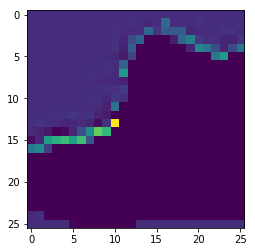

In [77]:
layer1 = activation_model.predict(image)[0]

print(activation_model.layers[0])

plt.imshow(layer1[0,:,:,filter_number])

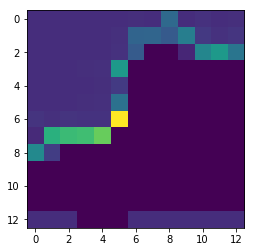

In [78]:
layer2 = activation_model.predict(image)[1]

print(activation_model.layers[1])

plt.imshow(layer2[0,:,:,filter_number])

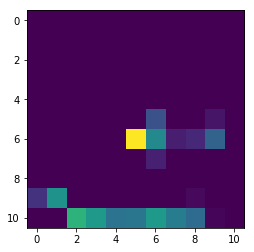

In [79]:
layer3 = activation_model.predict(image)[2]

print(activation_model.layers[2])

plt.imshow(layer3[0,:,:,filter_number])

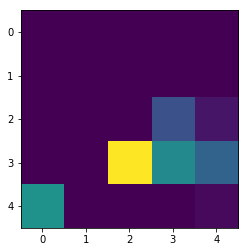

In [80]:
layer4 = activation_model.predict(image)[3]

print(activation_model.layers[3])

plt.imshow(layer4[0,:,:,filter_number])